# Breast Cancer Diagnosis using Machine Learning Classification Algorithms

Name: Abdul Wadood Asim

Email: abdulwadoodasim456@gmail.com

LinkedInn:www.linkedin.com/in/abdul-wadood-asim





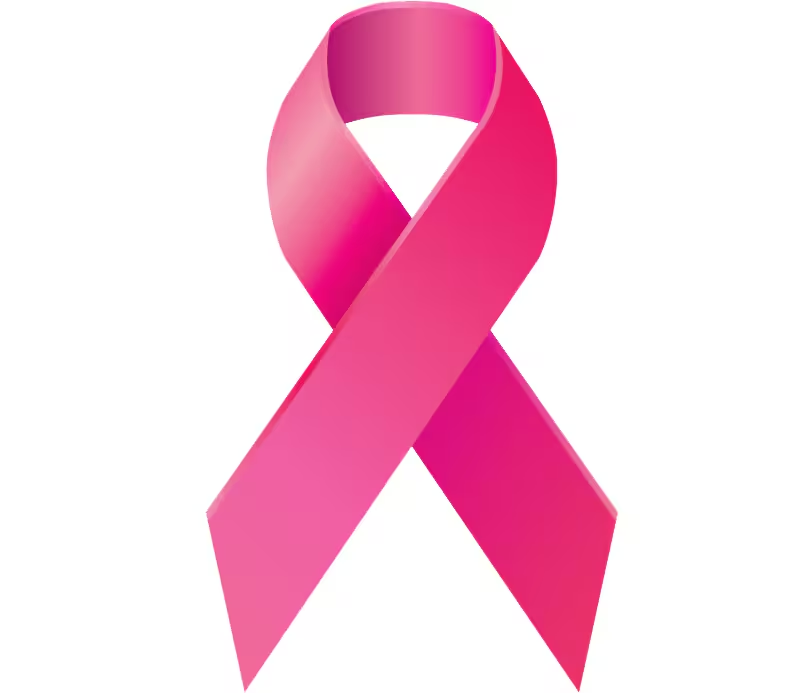






**Breast Cancer classification Tecniques**
1. KNN
2. Decision Tree
3. Single Layer Neural Network_Preceptron
4. Naive Bayes


A semester project of Machine Learning

# problem
Breast cancer is the most prevalent malignancy among women, constituting nearly one-third of all cancers diagnosed in women in the United States. It is also the second leading cause of cancer-related deaths among women. Breast cancer arises from the abnormal growth of cells in the breast tissue, forming what is commonly known as a tumor. However, not all tumors indicate cancer; they can be benign (non-cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). To diagnose breast cancer, medical professionals frequently use tests such as MRI, mammograms, ultrasounds, and biopsies

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
data = pd.read_csv('/content/data.csv')


In [5]:
data.head(4)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  

[4 rows x 33 columns]

# Data Cleanind and preprocessing

In [6]:
# Handle missing values by dropping columns with any missing values
data_cleaned = data.dropna(axis=1)


In [7]:
# Drop the 'id' column as it is not necessary for classification
data_cleaned = data_cleaned.drop(columns=['id'])

In [8]:
# shape
data_cleaned.shape

(569, 31)

In [60]:
data_cleaned.describe(include='all')

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
data_cleaned.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
data_cleaned.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
data_cleaned.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [14]:
# Encode the target variable 'diagnosis' (M = 1, B = 0)
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

# Correlation

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

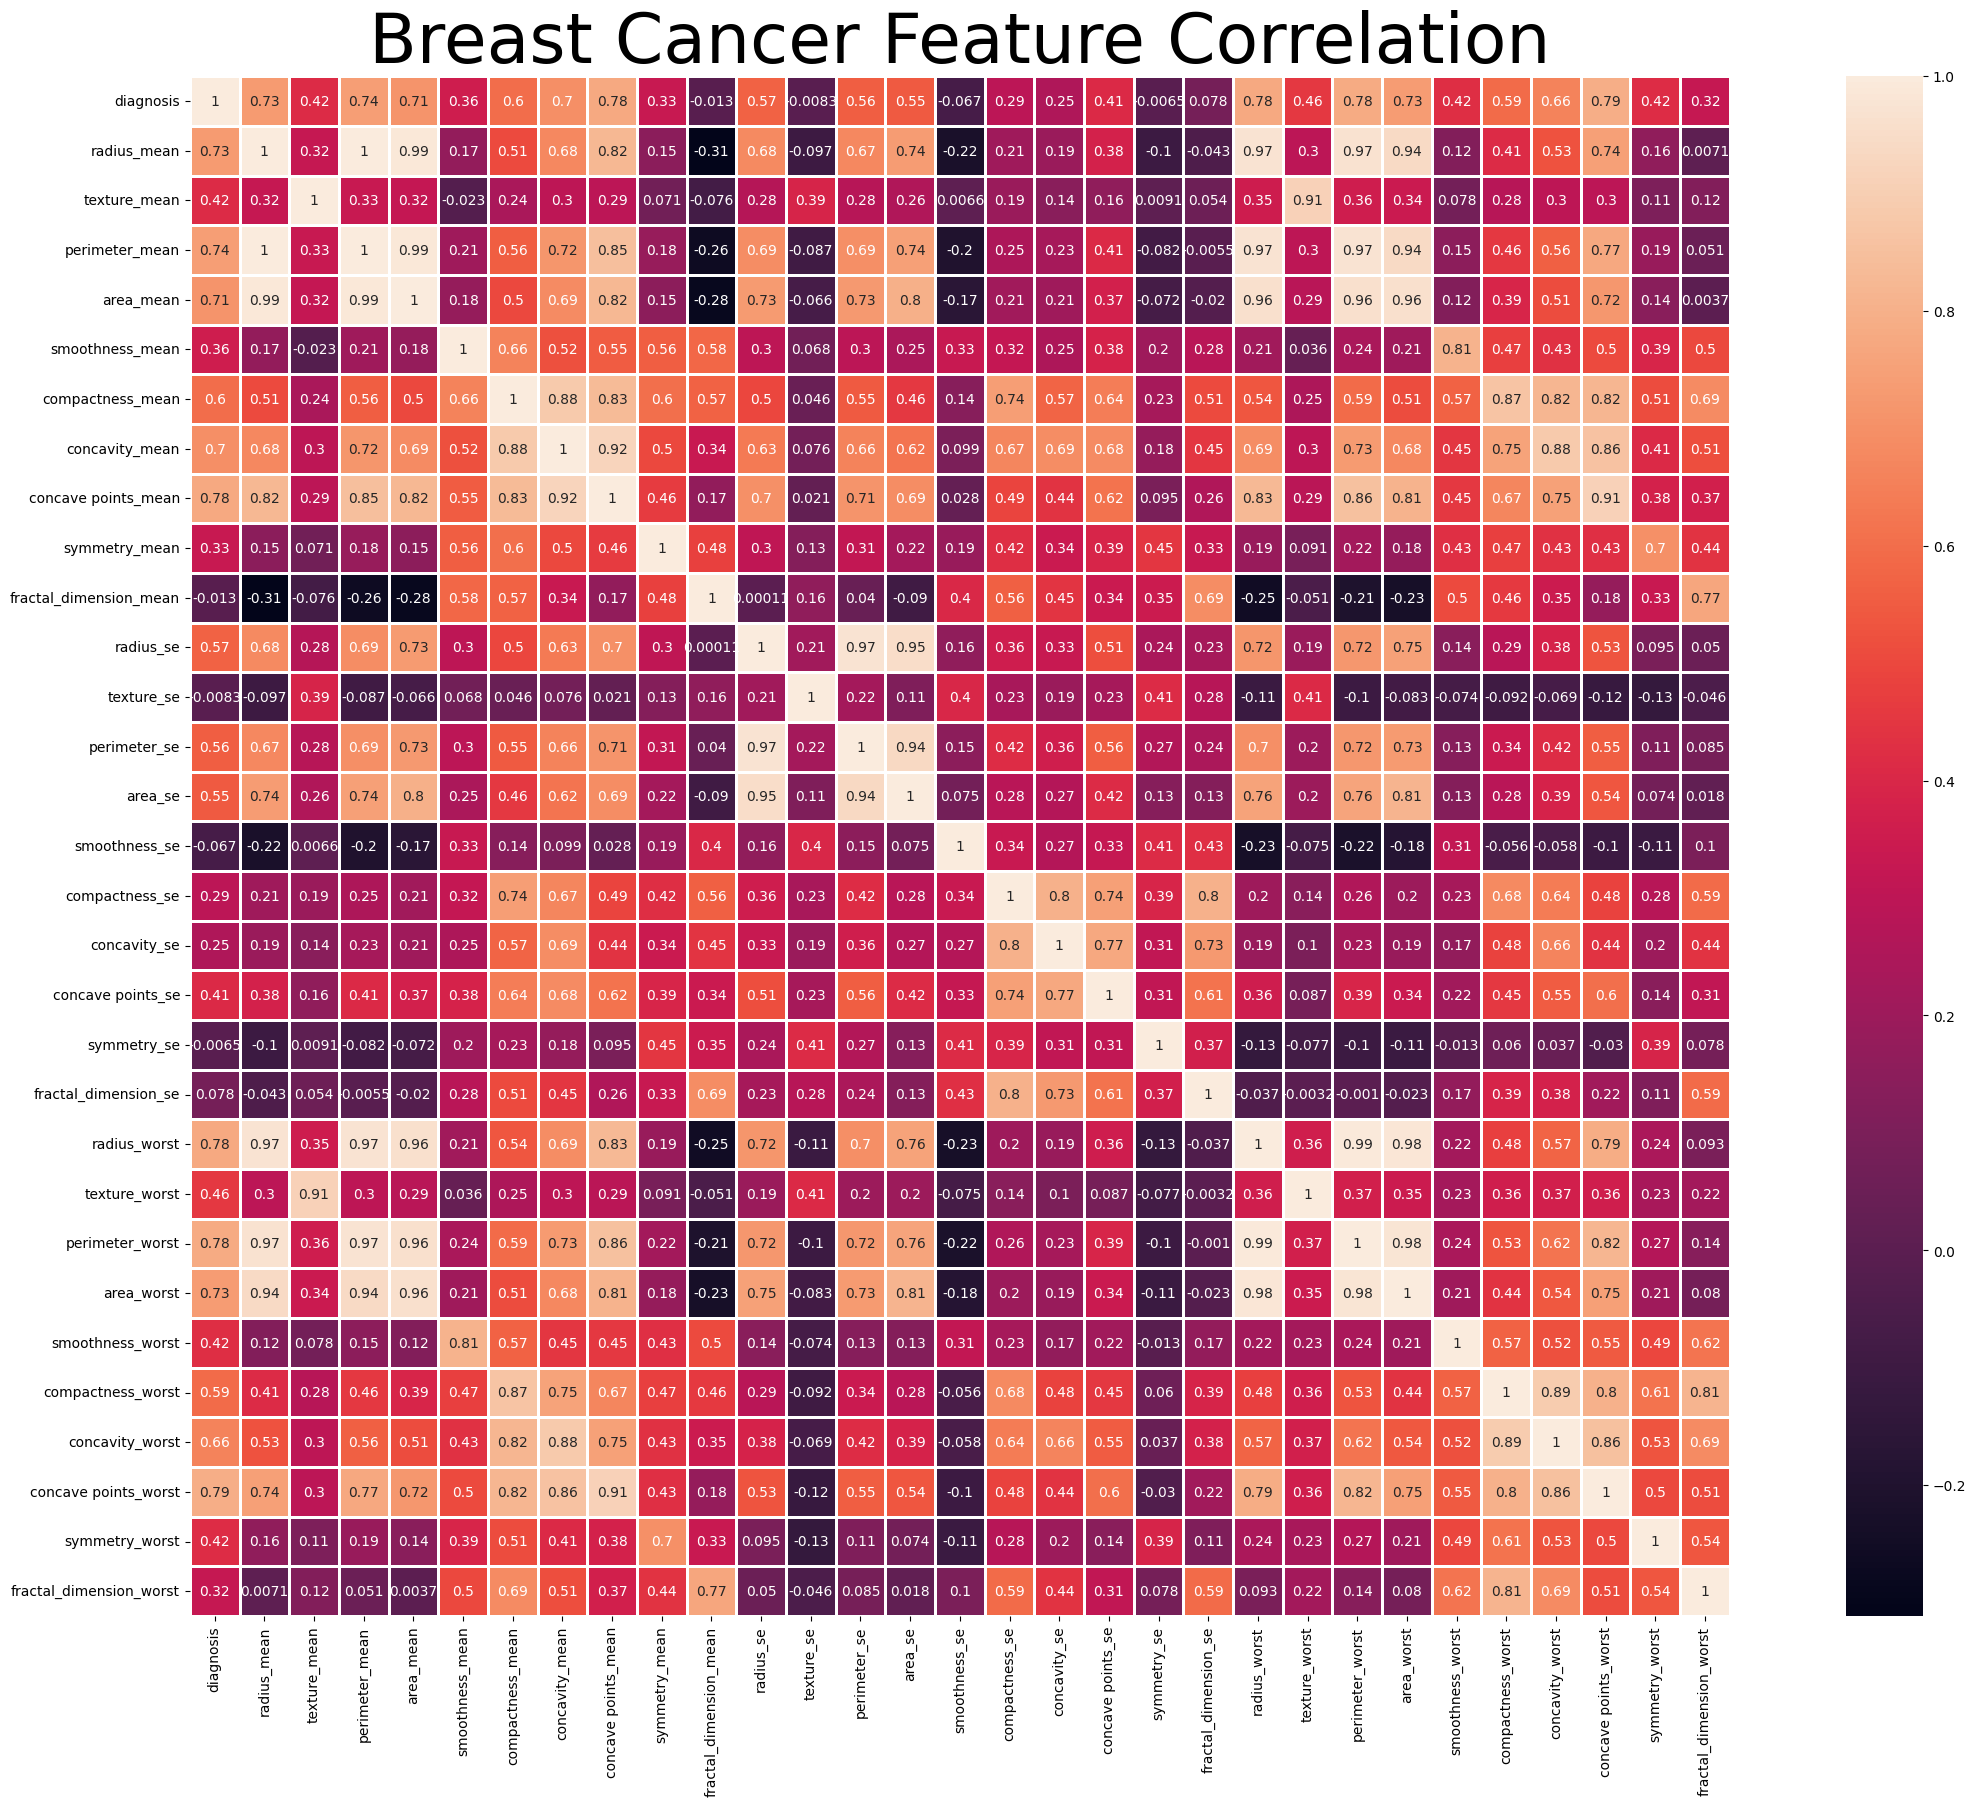

In [15]:
plt.figure(figsize=(30, 20))
plt.title('Breast Cancer Feature Correlation', fontsize=50, ha='center')
sns.heatmap(data_cleaned.corr(), annot=True, square='square', fmt='.2g',linewidths=2)

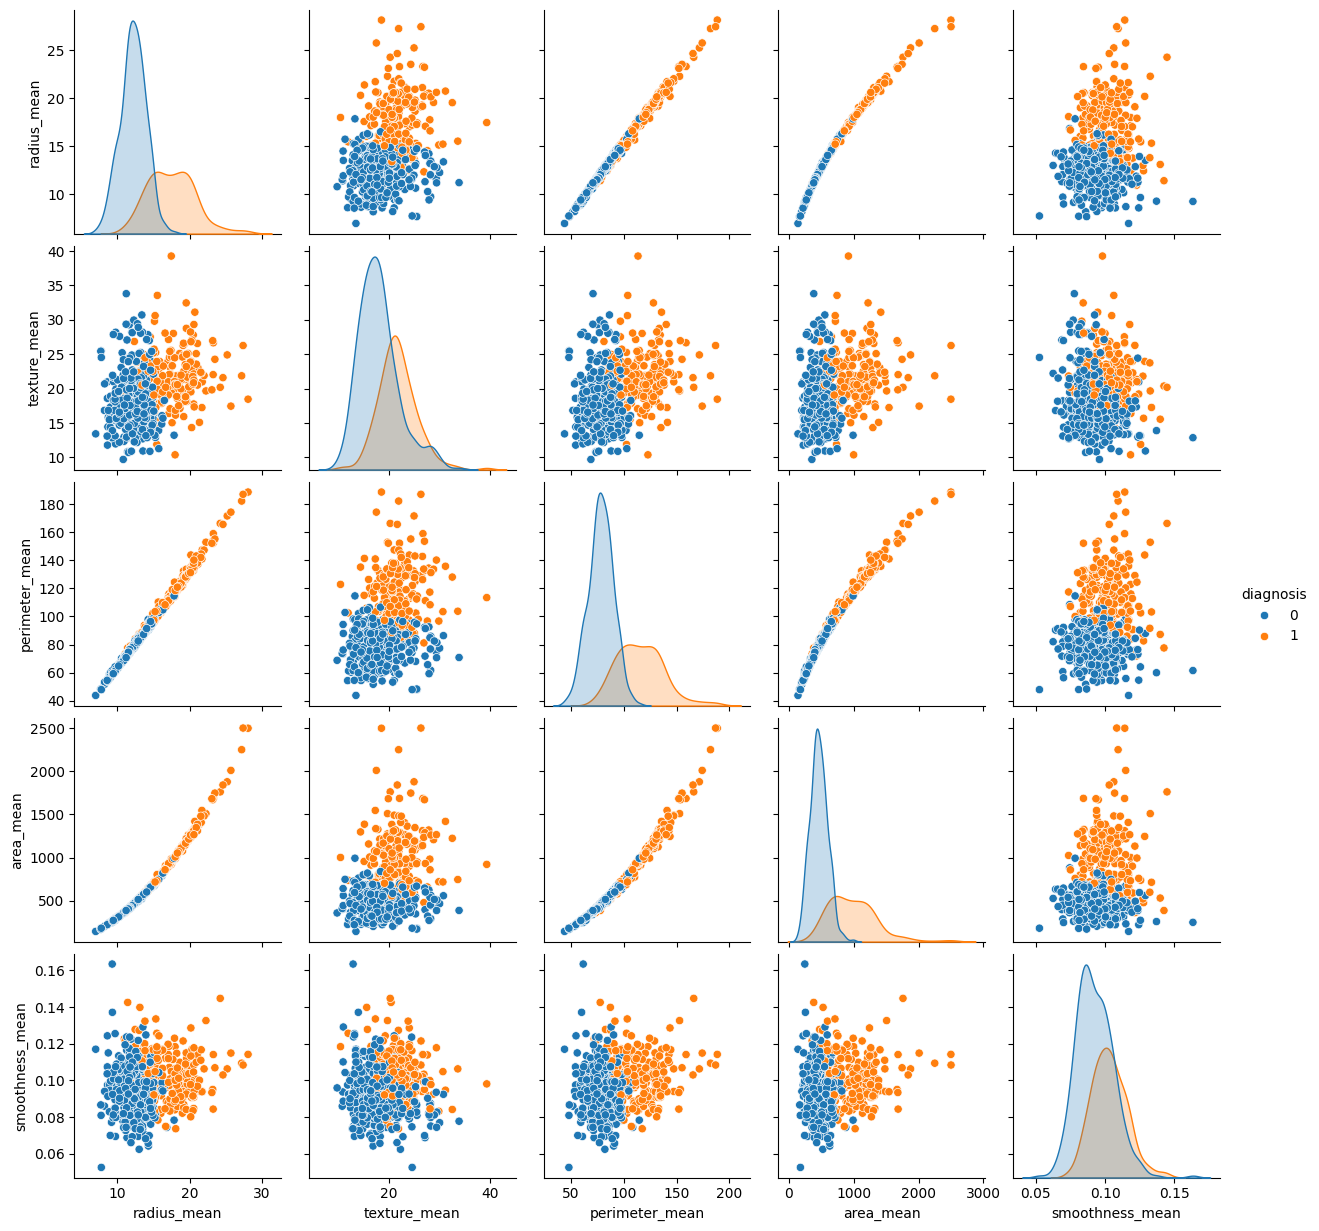

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data_cleaned, hue='diagnosis', vars=[
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'
]) # Use the correct column names from your DataFrame
plt.show()

# Preparing Data For Models

In [16]:
# Separate features and target variable
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']


In [17]:
 #Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate the model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

In [40]:
# Dictionary to store results
results = {}

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = evaluate_model(y_test, y_pred_knn)

 # K-Nearest Neighbors (KNN)

In [57]:
 #K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn, precision_knn, recall_knn, f1_knn, conf_matrix_knn = evaluate_model(y_test, y_pred_knn)

print("KNN:")
print(f"Accuracy: {accuracy_knn:.2f}, Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}, F1 Score: {f1_knn:.2f}")




KNN:
Accuracy: 0.96, Precision: 1.00, Recall: 0.88, F1 Score: 0.94


# results
**Accuracy:** 0.96

**Precision:**  1.00

**Recall:** 0.88

**F1 Score:** 0.94

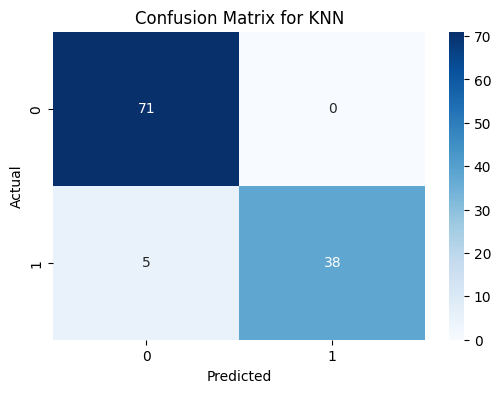

In [58]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

In [55]:
# Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt, precision_dt, recall_dt, f1_dt, conf_matrix_dt = evaluate_model(y_test, y_pred_dt)

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}, F1 Score: {f1_dt:.2f}")




Decision Tree:
Accuracy: 0.95, Precision: 0.93, Recall: 0.93, F1 Score: 0.93


# Results
**Accuracy:** 0.95

 **Precision:** 0.93

**Recall:** 0.93

 **F1 Score:**  0.93

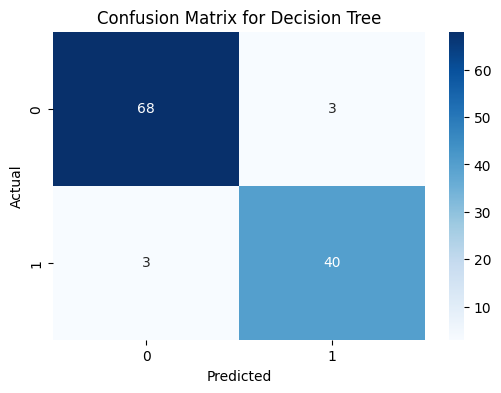

In [56]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Single Layer Artificial Neural Network (Perceptron)

In [54]:
#Single Layer Artificial Neural Network (Perceptron)
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron, precision_perceptron, recall_perceptron, f1_perceptron, conf_matrix_perceptron = evaluate_model(y_test, y_pred_perceptron)

print("Perceptron:")
print(f"Accuracy: {accuracy_perceptron:.2f}, Precision: {precision_perceptron:.2f}, Recall: {recall_perceptron:.2f}, F1 Score: {f1_perceptron:.2f}")




Perceptron:
Accuracy: 0.87, Precision: 0.74, Recall: 1.00, F1 Score: 0.85


# Results
**Accuracy:** 0.87

**Precision:** 0.74

**Recall:** 1.00

**F1 Score:** 0.85

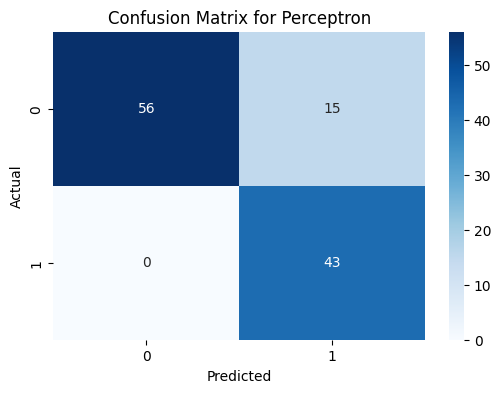

In [53]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Perceptron')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Naive Bayes

In [50]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb, precision_nb, recall_nb, f1_nb, conf_matrix_nb = evaluate_model(y_test, y_pred_nb)

print("Naive Bayes:")
print(f"Accuracy: {accuracy_nb:.2f}, Precision: {precision_nb:.2f}, Recall: {recall_nb:.2f}, F1 Score: {f1_nb:.2f}")




Naive Bayes:
Accuracy: 0.97, Precision: 1.00, Recall: 0.93, F1 Score: 0.96


# Results
**Accuracy:** 0.97

**Precision:** 1.00

**Recall:** 0.93

**F1 Score:** 0.96

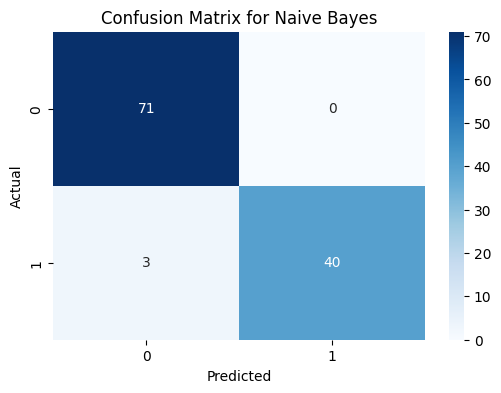

In [51]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

_______________________________________________________


# Comparasion

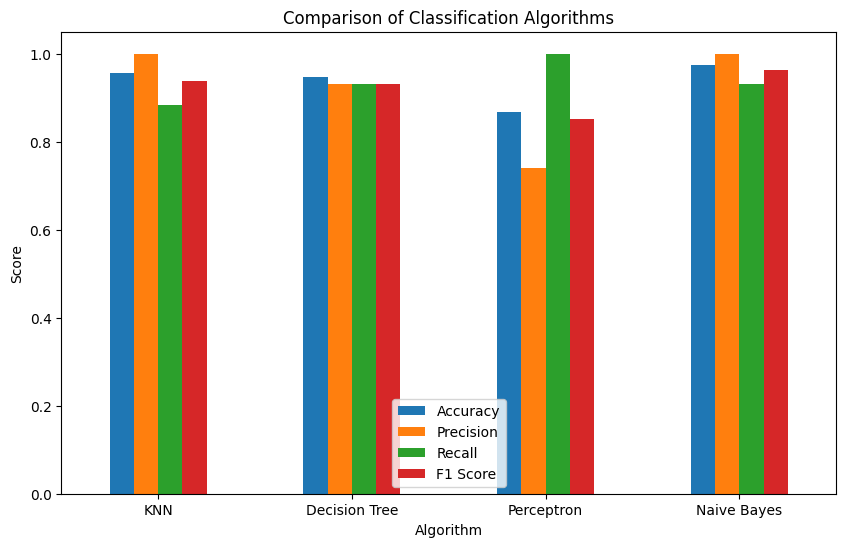

In [48]:
results = {
    'KNN': (accuracy_knn, precision_knn, recall_knn, f1_knn),
    'Decision Tree': (accuracy_dt, precision_dt, recall_dt, f1_dt),
    'Perceptron': (accuracy_perceptron, precision_perceptron, recall_perceptron, f1_perceptron),
    'Naive Bayes': (accuracy_nb, precision_nb, recall_nb, f1_nb)
}

# Create a DataFrame for visualization
metrics_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

# Plot the evaluation metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classification Algorithms')
plt.ylabel('Score')
plt.xlabel('Algorithm')
plt.xticks(rotation=0)
plt.show()

# Performance Comparison of Classification Algorithms on Breast Cancer Dataset
Key Performance Metrics
Here are the performance metrics for each algorithm:

**K-Nearest Neighbors (KNN)**

Accuracy: 0.96

Precision: 1.00

Recall: 0.88

F1 Score: 0.94

**Decision Tree**

Accuracy: 0.95

Precision: 0.93

Recall: 0.93

F1 Score: 0.93

**Single Layer Artificial Neural Network (Perceptron)**

Accuracy: 0.87

Precision: 0.74

Recall: 1.00

F1 Score: 0.85

**Naive Bayes**

Accuracy: 0.97

Precision: 1.00

Recall: 0.93

F1 Score: 0.96

# Strengths and Weaknesses
1. K-Nearest Neighbors (KNN)

**Strengths:**

High precision (1.00) indicates it is very effective in identifying true positive cases of breast cancer.
High accuracy (0.96) and F1 Score (0.94), showing overall good performance.

**Weaknesses:**
Lower recall (0.88) compared to other algorithms means it might miss some positive cases.
Computationally expensive with large datasets, which may be problematic in real-time scenarios.

2. Decision Tree

**Strengths:**

Balanced performance across all metrics (Accuracy: 0.95, Precision: 0.93, Recall: 0.93, F1 Score: 0.93).
Easy to interpret and visualize, aiding in understanding the decision-making process.

**Weaknesses:**

Susceptible to overfitting, especially with deep trees.
Slightly lower precision compared to KNN and Naive Bayes.

3. Single Layer Artificial Neural Network (Perceptron)

**Strengths:**

High recall (1.00), ensuring it identifies all positive cases.
Efficient for binary classification tasks.

**Weaknesses:**

Lower accuracy (0.87), precision (0.74), and F1 Score (0.85), indicating less reliable performance compared to other algorithms.
Only effective for linearly separable data, which may not always be the case in breast cancer datasets.

4. Naive Bayes

**Strengths:**

Highest accuracy (0.97) and precision (1.00), indicating excellent performance.
Computationally efficient and handles small datasets well.

**Weaknesses:**

Assumes feature independence, which may not hold true for breast cancer data.
Although the recall (0.93) is high, it is slightly lower than the recall of the Perceptron.

# Summary Report

Key Findings:

Naive Bayes shows the highest accuracy (0.97) and precision (1.00), making it the most reliable in identifying true positive cases without false positives.

KNN also shows strong performance with high precision (1.00) and good overall metrics, but slightly lower recall (0.88).

Decision Tree provides a balanced performance with an accuracy of 0.95 and equally strong precision and recall (0.93).

The Perceptron, while achieving perfect recall (1.00), has lower precision (0.74) and accuracy (0.87), indicating it might classify many false positives.

Comparison Table


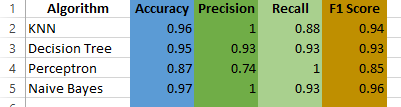

**Conclusion**
In summary, Naive Bayes and KNN show the best performance in terms of accuracy and precision. Decision Tree offers a well-balanced performance, making it a reliable choice for classification tasks with breast cancer data. The Perceptron, while having high recall, suffers from lower precision and accuracy, indicating potential overclassification of positive cases. Each algorithm has its own strengths and weaknesses, and the choice of the algorithm may depend on the specific requirements and constraints of the application in breast cancer diagnosis.



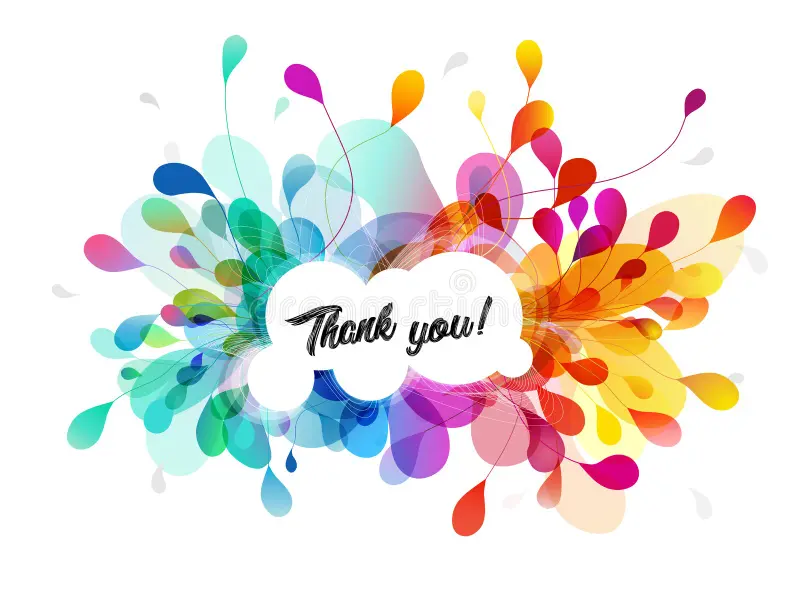